<a href="https://colab.research.google.com/github/Darwin575/CSE422_Courseworks/blob/main/active_function_visualization_Lariosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

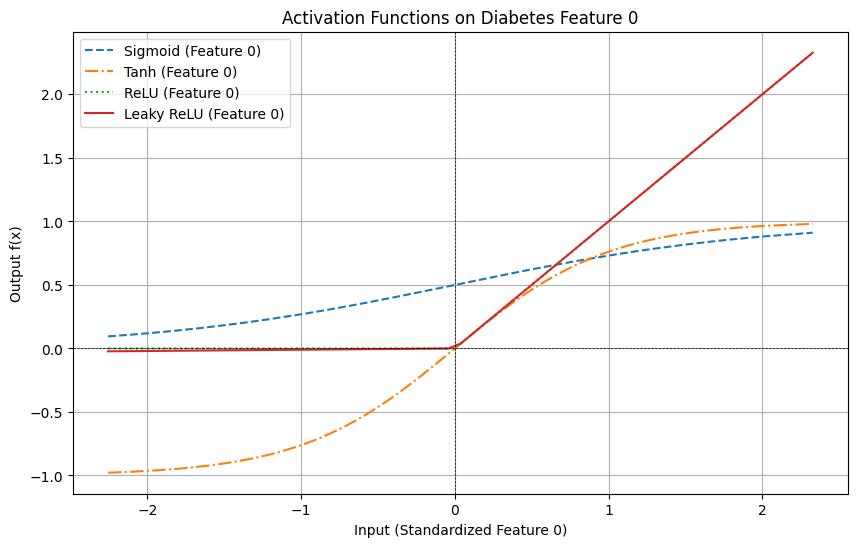

Softmax Outputs for first 5 samples (multi-class view):
[[0.15039669 0.19602943 0.24711771 0.10697732 0.02665643 0.03248283
  0.02712147 0.06396123 0.10264816 0.04660873]
 [0.1025911  0.04175343 0.03616668 0.06136341 0.08936187 0.07133821
  0.51016379 0.04652629 0.02537412 0.01536111]
 [0.36841758 0.17793151 0.15609167 0.05441808 0.02350555 0.02987472
  0.03105208 0.05805617 0.0651092  0.03554346]
 [0.01579654 0.04019311 0.08051642 0.04754052 0.13275753 0.17375208
  0.04816274 0.21135407 0.16554033 0.08438667]
 [0.12368734 0.04320896 0.0514001  0.17493686 0.1199782  0.15331193
  0.131074   0.10459391 0.05637822 0.04143046]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# Load Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data  # All features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardizing for better activation function response

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Subtract max(x) for numerical stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Compute outputs for each activation function across all features
sigmoid_vals = sigmoid(X_scaled)
tanh_vals = tanh(X_scaled)
relu_vals = relu(X_scaled)
leaky_relu_vals = leaky_relu(X_scaled)
softmax_vals = softmax(X_scaled)  # Softmax applied to all features (multi-dimensional output)

# Sorting indices for better visualization
sorted_indices = np.argsort(X_scaled[:, 0])

# Plot activation functions
plt.figure(figsize=(10, 6))

plt.plot(X_scaled[sorted_indices, 0], sigmoid_vals[sorted_indices, 0], label="Sigmoid (Feature 0)", linestyle="--")
plt.plot(X_scaled[sorted_indices, 0], tanh_vals[sorted_indices, 0], label="Tanh (Feature 0)", linestyle="-.")
plt.plot(X_scaled[sorted_indices, 0], relu_vals[sorted_indices, 0], label="ReLU (Feature 0)", linestyle=":")
plt.plot(X_scaled[sorted_indices, 0], leaky_relu_vals[sorted_indices, 0], label="Leaky ReLU (Feature 0)", linestyle="-")

plt.title("Activation Functions on Diabetes Feature 0")
plt.xlabel("Input (Standardized Feature 0)")
plt.ylabel("Output f(x)")
plt.axhline(y=0, color='black', linewidth=0.5, linestyle='dashed')
plt.axvline(x=0, color='black', linewidth=0.5, linestyle='dashed')
plt.legend()
plt.grid()
plt.show()

# Softmax example with multiple features
print("Softmax Outputs for first 5 samples (multi-class view):")
print(softmax_vals[:5])  # Show softmax outputs for the first 5 samples


In [ ]:
import pandas as pd

# Convert to DataFrame for better readability
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Display column names
print("Column Names in the Dataset:")
print(df.columns)

# Select the first feature and display values
feature_name = df.columns[0]  # The first feature used in the modified code
print("\nFeature Used:", feature_name)
print("\nFirst 10 Values of This Feature:")
print(df[feature_name].head(10))  # Display first 10 values

Column Names in the Dataset:
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

Feature Used: age

First 10 Values of This Feature:
0    0.038076
1   -0.001882
2    0.085299
3   -0.089063
4    0.005383
5   -0.092695
6   -0.045472
7    0.063504
8    0.041708
9   -0.070900
Name: age, dtype: float64
